In [210]:
import pandas as pd
import re
import nltk
import string
import google_conf
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [211]:
plt.style.use('seaborn-white')
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

/var/folders/zg/zvg9y3rs7j527jxfq9sc2xqc0000gn/T/ipykernel_4724/1576836852.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [212]:
pop_data = google_conf.setup(sheet_url="https://docs.google.com/spreadsheets/d/1o8L0Rt4CzQ_DcYdaKgCdige4nJs0sydlTGiMBSstQtc/edit?usp=sharing", service_account_path="../../ServiceAccountsKey.json")

In [213]:
articles_metadata = pd.read_json("../data/article_metadata.json")
articles_metadata.head(5)

,pop_id,year,authors,journal,title,type,filepath
0,0,2011,Bos et al.,Political Communication,How the Media Shape Perceptions of Right-Wing ...,article,Political Communication/2011 - Bos et al. - Ho...
1,1,2019,Blassnig et al.,Political Communication,Hitting a Nerve: Populist News Articles Lead t...,article,Political Communication/2019 - Blassing et al....
2,2,2017,Caramani,American Political Science Review,Will vs. Reason: The Populist and Technocratic...,article,American Political Science Review/2017 - Caram...
3,3,2020,"Wuttke,Schimpf, Schoen",American Political Science Review,When the Whole Is Greater than the Sum of Its ...,article,American Political Science Review/2020 - Wuttk...
4,4,2014,Treib,Journal of European Public Policy,"The voter says no, but nobody listens: causes ...",article,Journal of European Public Policy/2014 - Treib...


In [214]:
articles_metadata = articles_metadata[articles_metadata["filepath"].apply(bool)].copy()

In [215]:
sample_pop_ids = [62, 377, 188, 364, 499, 228, 376, 90, 227, 330]

# Test with one document

In [216]:
pop_id = 90
path = "../data/large_data/articles_filteredtexts/"
filename = "filteredtext_pop_id_{}.txt".format(str(pop_id))

In [217]:
with open(path + filename, "r") as f:
    filteredtext = f.read()

In [218]:
test_str_list = filteredtext.split()[:100]
print(test_str_list)

['European', 'Journal', 'of', 'Political', 'Research', '59:', '3–24,', '2020', '3', 'The', 'effects', 'of', 'populism', 'as', 'a', 'social', 'identity', 'frame', 'on', 'persuasion', 'and', 'mobilisation:', 'Evidence', 'from', 'a', '15-country', 'experiment', 'LINDA', 'BOS,', 'CHRISTIAN', 'SCHEMER,', 'NICOLETA', 'CORBU,', 'MICHAEL', 'HAMELEERS,', 'IOANNIS', 'ANDREADIS,', 'ANNE', 'SCHULZ,', 'DESIRÉE', 'SCHMUCK,', 'CARSTEN', 'REINEMANN7', '&', 'NAYLA', 'FAWZI7', '1University', 'of', 'Amsterdam,', 'The', 'Netherlands;', '2Johannes', 'Gutenberg', 'University,', 'Mainz,', 'Germany;', '3National', 'University', 'of', 'Political', 'Studies', 'and', 'Public', 'Administration,', 'Bucharest,', 'Romania;', '4Aristotle', 'University', 'of', 'Thessaloniki,', 'Greece;', '5University', 'of', 'Zürich,', 'Switzerland;', '6University', 'of', 'Vienna,', 'Austria;', '7Ludwig-Maximilians-University', 'Munich,', 'Germany', 'Abstract.', 'This', 'article', 'investigates', 'the', 'impact', 'of', 'populist', 'me

# populis* usage overview

In [219]:
# gather indeces:
filteredtext_split = filteredtext.split()
inxs = [t[0] for t in enumerate(filteredtext_split) if re.search("populis", t[1], re.IGNORECASE)]
inxs

[12,
 89,
 105,
 134,
 164,
 246,
 250,
 296,
 319,
 342,
 521,
 548,
 554,
 582,
 604,
 645,
 680,
 705,
 732,
 778,
 812,
 933,
 943,
 978,
 1013,
 1074,
 1082,
 1098,
 1111,
 1125,
 1168,
 1197,
 1278,
 1334,
 1340,
 1362,
 1375,
 1438,
 1458,
 1644,
 1676,
 1730,
 1755,
 1787,
 1807,
 1860,
 1883,
 1907,
 1956,
 1993,
 2019,
 2091,
 2196,
 2225,
 2235,
 2284,
 2402,
 2414,
 2427,
 2452,
 2501,
 2506,
 2534,
 2549,
 2569,
 2588,
 2601,
 2611,
 2630,
 2644,
 2720,
 2744,
 2835,
 3009,
 3083,
 3118,
 3150,
 3388,
 3425,
 3492,
 3514,
 3654,
 3675,
 3722,
 3759,
 4259,
 4481,
 4524,
 4565,
 4925,
 4953,
 5337,
 5527,
 5722,
 5865,
 6133,
 6172,
 6201,
 6273,
 6383,
 6414,
 6437,
 6458,
 6562,
 6615,
 6632,
 6708,
 6858,
 6923,
 7292,
 7333,
 7341,
 7355,
 7369,
 7506,
 7518,
 7595,
 7744,
 7747,
 7771,
 7876,
 7900,
 7913,
 7946,
 7957,
 8006]

In [220]:
for i in inxs:
    print(filteredtext_split[i-2:i+3])


['effects', 'of', 'populism', 'as', 'a']
['impact', 'of', 'populist', 'messages', 'on']
['7,).', 'Specifically,', 'populist', 'communicators', 'rely']
['is', 'called', '‘populist', 'identity', 'framing’']
['ordinary', 'people,', 'populist', 'communicators', 'engage']
['of', 'the', 'populist', 'identity', 'frames.']
['frames.', 'Keywords:', 'populism;', 'social', 'identity']
['(Mudde', '2004),', 'populist', 'messages', 'can']
['Turner', '1986),', 'populist', 'rhetoric', 'frames']
['to', 'this', 'populist', 'identity', 'frame']
['of', 'the', 'populist', 'message', '(Mudde']
['with', 'stronger', 'populist', 'attitudes', 'are']
['attracted', 'to', 'populist', 'parties', '(Akkerman']
['of', 'a', 'populist', 'party', '(Van']
['supportive', 'of', 'populism', '(Rico', 'et']
['other', 'words,', 'populism', 'not', 'only']
['component', 'of', 'populism', '(e.g.,', 'Busby']
['aspect', 'of', 'populist', 'rhetoric', 'on']
['consequences', 'of', 'populism', 'as', 'a']
['implications', 'of', 'populist

In [221]:
def extract_indeces(pop_id):
    path = "../data/large_data/articles_filteredtexts/"
    filename = "filteredtext_pop_id_{}.txt".format(str(pop_id))
    with open(path + filename, "r") as f:
        filteredtext = f.read()
    filteredtext_split = filteredtext.split()
    inxs = [t[0] for t in enumerate(filteredtext_split) if re.search("populis", t[1], re.IGNORECASE)]
    return inxs
articles_metadata["populism_inxs"] = articles_metadata["pop_id"].apply(extract_indeces)

In [222]:
articles_metadata["populism_inxs"]

0      [30, 66, 104, 122, 160, 263, 284, 310, 314, 31...
1      [26, 35, 64, 73, 124, 133, 150, 159, 214, 238,...
2      [19, 42, 57, 97, 138, 163, 377, 504, 579, 671,...
3      [65, 125, 142, 195, 225, 254, 282, 304, 313, 3...
4              [296, 2412, 4038, 4146, 4596, 4638, 4759]
                             ...                        
536                               [155, 238, 2478, 3747]
537    [25, 516, 526, 534, 556, 752, 1169, 1203, 1216...
538    [7, 51, 97, 316, 386, 392, 452, 649, 660, 720,...
539    [4, 59, 195, 217, 258, 878, 905, 1029, 1570, 2...
540    [16, 22, 26, 80, 95, 109, 114, 131, 153, 162, ...
Name: populism_inxs, Length: 539, dtype: object

In [223]:
articles_metadata["populis*_N"] = articles_metadata["populism_inxs"].apply(len)

In [224]:
articles_metadata["populis*_N"].sum()

42174

In [225]:
replace_tups = [
    ("populists", "populis*"),
    ("populisms", "populis*"),
    ("populist", "populis*"),
    ("populism", "populis*"),
]
def clean_conc(conc_string):
    conc_cleaned = " ".join([re.sub("\W", "", w, count=10) for w in conc_string.lower().split()])
    conc_cleaned = re.sub("\d+", "", conc_cleaned, count=10)
    #conc_cleaned = conc_cleaned.lower().translate(str.maketrans("", "", string.punctuation))
    for tup in replace_tups:
        conc_cleaned = conc_cleaned.replace(tup[0], tup[1])
    return conc_cleaned

In [226]:
clean_conc("4right-wing populists.12@#`^&")

'rightwing populis*'

In [227]:
def get_concordance(row, left=1, right=1):
    pop_id = row["pop_id"]
    path = "../data/large_data/articles_filteredtexts/"
    filename = "filteredtext_pop_id_{}.txt".format(str(pop_id))
    with open(path + filename, "r") as f:
        filteredtext = f.read()
    filteredtext_split = filteredtext.split()
    inxs = row["populism_inxs"]
    conc_data = [clean_conc(" ".join(filteredtext_split[i-left: i+right+1])) for i in inxs]
    return conc_data

In [228]:
articles_metadata["conc_left1"] = articles_metadata.apply(lambda row: get_concordance(row, left=1, right=0), axis=1)
articles_metadata["conc_right1"] = articles_metadata.apply(lambda row: get_concordance(row, left=0, right=1), axis=1)

In [229]:
articles_metadata

,pop_id,year,authors,journal,title,type,filepath,populism_inxs,populis*_N,conc_left1,conc_right1
0,0,2011,Bos et al.,Political Communication,How the Media Shape Perceptions of Right-Wing ...,article,Political Communication/2011 - Bos et al. - Ho...,"[30, 66, 104, 122, 160, 263, 284, 310, 314, 31...",206,"[rightwing populis*, rightwing populis*, right...","[populis* leaders, populis* leaders, populis* ..."
1,1,2019,Blassnig et al.,Political Communication,Hitting a Nerve: Populist News Articles Lead t...,article,Political Communication/2019 - Blassing et al....,"[26, 35, 64, 73, 124, 133, 150, 159, 214, 238,...",240,"[nerve populis*, more populis*, nerve populis*...","[populis* news, populis* reader, populis* news..."
2,2,2017,Caramani,American Political Science Review,Will vs. Reason: The Populist and Technocratic...,article,American Political Science Review/2017 - Caram...,"[19, 42, 57, 97, 138, 163, 377, 504, 579, 671,...",124,"[the populis*, analytically populis*, that pop...","[populis* and, populis* and, populis* and, pop..."
3,3,2020,"Wuttke,Schimpf, Schoen",American Political Science Review,When the Whole Is Greater than the Sum of Its ...,article,American Political Science Review/2020 - Wuttk...,"[65, 125, 142, 195, 225, 254, 282, 304, 313, 3...",301,"[of populis*, both conceptuallyandempiricallyt...","[populis* attitudes, conceptuallyandempiricall..."
4,4,2014,Treib,Journal of European Public Policy,"The voter says no, but nobody listens: causes ...",article,Journal of European Public Policy/2014 - Treib...,"[296, 2412, 4038, 4146, 4596, 4638, 4759]",7,"[euroscepticism populis*, on populis*, on popu...","[populis* secondorder, populis* and, populis* ..."
...,...,...,...,...,...,...,...,...,...,...,...
536,536,2018,Grzymala-Busse,Current History,Poland’s Path to Illiberalism,article,Current History/2018 - Grzymala-Busse - Poland...,"[155, 238, 2478, 3747]",4,"[illiberal populis*, of populis*, often populi...","[populis* it, populis* pis, populis* and, popu..."
537,537,2017,Eichengreen,Current History,The Populist Turn in American Politics,article,Current History/2017 - Eichengreen - The Popul...,"[25, 516, 526, 534, 556, 752, 1169, 1203, 1216...",24,"[the populis*, new populis*, old populis*, the...","[populis* turn, populis* bears, populis* of, p..."
538,538,2014,Mudde,Current History,The Far Right and the European Elections,article,Current History/2014 - Mudde - The Far Right a...,"[7, 51, 97, 316, 386, 392, 452, 649, 660, 720,...",18,"[antieuropean populis*, antieuropean populis*,...","[populis* are, populis* in, populis* backlash,..."
539,539,2020,Cano,European History Quarterly,Printing the People,article,European History Quarterly/2020 - Cano - Print...,"[4, 59, 195, 217, 258, 878, 905, 1029, 1570, 2...",40,"[people populis*, this populis*, nationalism p...","[populis* photography, populis* nationalism, p..."


In [230]:
conc_left1_all = []
for conc_list in articles_metadata["conc_left1"]:
    conc_left1_all.extend(conc_list)

In [231]:
len(conc_left1_all)

42174

In [232]:
conc_left1_all_df = pd.DataFrame(nltk.FreqDist(conc_left1_all).most_common(), columns=["conc", "count"])
conc_left1_all_df[:100]

,conc,count
0,of populis*,7793
1,the populis*,3216
2,rightwing populis*,1703
3,that populis*,1411
4,a populis*,1372
...,...,...
95,illiberal populis*,38
96,transnational populis*,38
97,such populis*,37
98,however populis*,37


In [233]:
#google_conf.set_with_dataframe(pop_data.add_worksheet("conc_left1", 1,1), conc_left1_all_df)

In [234]:
conc_left1_interesting = ['rightwing populis*', 'leftwing populis*', 'right populis*',  'left populis*', 'radical populis*', 'authoritarian populis*', 'class populis*',  'exclusionary populis*', 'economic populis*', 'leftist populis*', 'political populis*', 'radicalright populis*']
conc_left1_interesting

['rightwing populis*',
 'leftwing populis*',
 'right populis*',
 'left populis*',
 'radical populis*',
 'authoritarian populis*',
 'class populis*',
 'exclusionary populis*',
 'economic populis*',
 'leftist populis*',
 'political populis*',
 'radicalright populis*']

In [235]:
conc_left1_interesting_df = conc_left1_all_df[conc_left1_all_df["conc"].isin(conc_left1_interesting)]
conc_left1_interesting_df

,conc,count
2,rightwing populis*,1703
13,leftwing populis*,400
16,right populis*,237
20,left populis*,192
33,authoritarian populis*,103
41,exclusionary populis*,91
42,class populis*,86
44,radical populis*,84
57,economic populis*,68
63,political populis*,61


In [236]:
#google_conf.set_with_dataframe(pop_data.add_worksheet("conc_left1_interesting",1,1), conc_left1_interesting_df)

In [237]:
def ectract_counts_of_interesting(list_of_concs):
    conc_count_dict = dict([(conc, list_of_concs.count(conc)) for conc in conc_left1_interesting])
    return conc_count_dict
articles_metadata["conc_left1_interesting"] = articles_metadata["conc_left1"].apply(ectract_counts_of_interesting)

In [238]:
articles_metadata.head(20)

,pop_id,year,authors,journal,title,type,filepath,populism_inxs,populis*_N,conc_left1,conc_right1,conc_left1_interesting
0,0,2011,Bos et al.,Political Communication,How the Media Shape Perceptions of Right-Wing ...,article,Political Communication/2011 - Bos et al. - Ho...,"[30, 66, 104, 122, 160, 263, 284, 310, 314, 31...",206,"[rightwing populis*, rightwing populis*, right...","[populis* leaders, populis* leaders, populis* ...","{'rightwing populis*': 122, 'leftwing populis*..."
1,1,2019,Blassnig et al.,Political Communication,Hitting a Nerve: Populist News Articles Lead t...,article,Political Communication/2019 - Blassing et al....,"[26, 35, 64, 73, 124, 133, 150, 159, 214, 238,...",240,"[nerve populis*, more populis*, nerve populis*...","[populis* news, populis* reader, populis* news...","{'rightwing populis*': 3, 'leftwing populis*':..."
2,2,2017,Caramani,American Political Science Review,Will vs. Reason: The Populist and Technocratic...,article,American Political Science Review/2017 - Caram...,"[19, 42, 57, 97, 138, 163, 377, 504, 579, 671,...",124,"[the populis*, analytically populis*, that pop...","[populis* and, populis* and, populis* and, pop...","{'rightwing populis*': 2, 'leftwing populis*':..."
3,3,2020,"Wuttke,Schimpf, Schoen",American Political Science Review,When the Whole Is Greater than the Sum of Its ...,article,American Political Science Review/2020 - Wuttk...,"[65, 125, 142, 195, 225, 254, 282, 304, 313, 3...",301,"[of populis*, both conceptuallyandempiricallyt...","[populis* attitudes, conceptuallyandempiricall...","{'rightwing populis*': 0, 'leftwing populis*':..."
4,4,2014,Treib,Journal of European Public Policy,"The voter says no, but nobody listens: causes ...",article,Journal of European Public Policy/2014 - Treib...,"[296, 2412, 4038, 4146, 4596, 4638, 4759]",7,"[euroscepticism populis*, on populis*, on popu...","[populis* secondorder, populis* and, populis* ...","{'rightwing populis*': 0, 'leftwing populis*':..."
5,5,2016,Hobolt,Journal of European Public Policy,"The Brexit vote: a divided nation, a divided c...",article,Journal of European Public Policy/2016 - Hobol...,"[241, 603, 805, 1028, 3348, 3382, 3939, 4786, ...",16,"[euroscepticism populis*, of populis*, the pop...","[populis* referendum, populis* parties, populi...","{'rightwing populis*': 0, 'leftwing populis*':..."
6,6,2018,Kreuder-Sonnen,Journal of European Public Policy,An authoritarian turn in Europe and European S...,article,Journal of European Public Policy/2018 - Kreud...,"[204, 266, 616, 627, 746, 776, 1822, 2457, 260...",23,"[nationalist populis*, legitimacy populis*, na...","[populis* have, populis* introduction, populis...","{'rightwing populis*': 2, 'leftwing populis*':..."
7,7,2019,"McDonnell, Werner",Journal of European Public Policy,Differently Eurosceptic: radical right populis...,article,Journal of European Public Policy/2019 - McDon...,"[30, 54, 101, 128, 279, 292, 342, 379, 514, 63...",27,"[right populis*, right populis*, right populis...","[populis* parties, populis* parties, populis* ...","{'rightwing populis*': 1, 'leftwing populis*':..."
8,8,2019,Schmidt,Journal of European Public Policy,Politicization in the EU: between national pol...,article,Journal of European Public Policy/2019 - Schmi...,"[142, 302, 529, 699, 1582, 2086, 2174, 2241, 2...",14,"[euroskeptic populis*, commission populis*, by...","[populis* or, populis* eurozone, populis* chal...","{'rightwing populis*': 0, 'leftwing populis*':..."
9,9,2020,Bakker et al.,Journal of European Public Policy,"Multidimensional incongruence, political disaf...",article,Journal of European Public Policy/2020 - Bakke...,"[284, 1165, 1595, 1717, 1792, 3403, 3435, 3443...",13,"[representation populis*, for populis*, for po...","[populis* research, populis* radical, populis*...","{'rightwing populis*': 0, 'leftwing populis*':..."


# Temporal overview

In [239]:
pop_id = 99

In [240]:
def get_split_text(pop_id):
    path = "../data/large_data/articles_filteredtexts/"
    filename = "filteredtext_pop_id_{}.txt".format(str(pop_id))
    with open(path + filename, "r") as f:
        filteredtext = f.read()
    return filteredtext.split()

def get_len(pop_id):
    path = "../data/large_data/articles_filteredtexts/"
    filename = "filteredtext_pop_id_{}.txt".format(str(pop_id))
    with open(path + filename, "r") as f:
        filteredtext = f.read()
    return len(filteredtext.split())

In [241]:
print(get_split_text(507))

['Full', 'Terms', '&', 'Conditions', 'of', 'access', 'and', 'use', 'can', 'be', 'found', 'at', 'https://www.tandfonline.com/action/journalInformation?journalCode=rcri20', 'Critical', 'Review', 'A', 'Journal', 'of', 'Politics', 'and', 'Society', 'ISSN:', '(Print)', '(Online)', 'Journal', 'homepage:', 'https://www.tandfonline.com/loi/rcri20', 'Brexit,', 'Positional', 'Populism,', 'and', 'the', 'Declining', 'Appeal', 'of', 'Valence', 'Politics', 'Colin', 'Hay', '&', 'Cyril', 'Benoît', 'To', 'cite', 'this', 'article:', 'Colin', 'Hay', '&', 'Cyril', 'Benoît', '(2019)', 'Brexit,', 'Positional', 'Populism,', 'and', 'the', 'Declining', 'Appeal', 'of', 'Valence', 'Politics,', 'Critical', 'Review,', '31:-4,', '389-404,', 'DOI:', '10./08913811..', 'Published', 'online:', '10', 'Aug', '2020.', 'Submit', 'your', 'article', 'to', 'this', 'journal', 'Article', 'views:', '623', 'View', 'related', 'articles', 'View', 'Crossmark', 'data', 'Citing', 'articles:', '1', 'View', 'citing', 'articles', 'Colin'

In [242]:
len(get_split_text(507))

5191

In [243]:
articles_metadata["wordcount"] = articles_metadata["pop_id"].apply(get_len)

In [244]:
articles_metadata.sort_values("wordcount")

,pop_id,year,authors,journal,title,type,filepath,populism_inxs,populis*_N,conc_left1,conc_right1,conc_left1_interesting,wordcount
393,393,2017,Breuilly et al.,Nations and Nationalism,Editorial,editorial,Nations and Nationalism/2017 - Breuilly et al....,[219],1,[nationalism populis*],[populis* authoritarianism],"{'rightwing populis*': 0, 'leftwing populis*':...",342
224,224,2015,"Kettell, Kerr",British Politics,Editorial,editorial,"British Politics/2015 - Kettell, Kerr - Editor...",[293],1,[nationalism populis*],[populis* party],"{'rightwing populis*': 0, 'leftwing populis*':...",375
396,396,2019,Breuilly et al.,Nations and Nationalism,Editorial,editorial,Nations and Nationalism/2019 - Breuilly et al....,"[134, 268]",2,"[between populis*, on populis*]","[populis* and, populis* and]","{'rightwing populis*': 0, 'leftwing populis*':...",581
241,241,2016,"Ardoin, Gronke",PS: Political Science and Politics,EDITORS’ CORNER,article,PS political science and politics journal/2016...,[597],1,[democratic populis*],[populis* as],"{'rightwing populis*': 0, 'leftwing populis*':...",1028
225,225,2015,Wellings,British Politics,English Nationalism And Euroscepticism,article,British Politics/2015 - Wellings - English Nat...,"[297, 536, 556, 561, 585, 641, 658, 921, 1005,...",12,"[left populis*, their populis*, it populis*, i...","[populis* of, populis* antagonism, populis* is...","{'rightwing populis*': 0, 'leftwing populis*':...",1776
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,290,2020,"Fornaro, Kaihovaara",European Journal of Political Economy,"Microdynamics, granularity and populism: The F...",article,European Journal of Political Economy/2020 - F...,"[24, 65, 92, 108, 111, 125, 152, 161, 180, 205...",200,"[and populis*, churning populis*, to populis*,...","[populis* the, populis* granularity, populis* ...","{'rightwing populis*': 5, 'leftwing populis*':...",17486
103,103,2019,Golec de Zavala et al.,Political Psychology,Collective Narcissism: Political Consequences ...,article,Political Psychology/2019 - Golec de Zavala et...,"[202, 324, 767, 858, 4584, 4599, 9053, 10234, ...",28,"[of populis*, hostility populis*, of populis*,...","[populis* rhetoric, populis* selfesteem, popul...","{'rightwing populis*': 0, 'leftwing populis*':...",17571
211,211,2020,Thornhill,International Theory,Constitutionalism and populism: national polit...,article,International Theory/2020 - Thornhill - Consti...,"[2, 48, 69, 126, 166, 185, 188, 230, 740, 741,...",119,"[and populis*, on populis*, many populis*, whi...","[populis* national, populis* government, popul...","{'rightwing populis*': 0, 'leftwing populis*':...",18270
506,506,2019,Friedman,Critical Review,Populists as Technocrats,article,Critical Review/2019 - Friedman - Populists as...,"[27, 39, 80, 87, 99, 112, 151, 214, 264, 275, ...",221,"[httpswwwtandfonlinecomloircri populis*, popu...","[populis* as, populis* as, populis* might, pop...","{'rightwing populis*': 4, 'leftwing populis*':...",22783


In [245]:
articles_metadata.sort_values("wordcount", ascending=False)

,pop_id,year,authors,journal,title,type,filepath,populism_inxs,populis*_N,conc_left1,conc_right1,conc_left1_interesting,wordcount
513,513,2014,Rothstein,Studies in American Political Development,Macune’s Monopoly: Economic Law and the Legacy...,article,Studies in American Political Development/2014...,"[8, 20, 95, 472, 496, 581, 665, 715, 724, 736,...",145,"[of populis*, the populis*, association populi...","[populis* sidney, populis* legacy, populis* di...","{'rightwing populis*': 0, 'leftwing populis*':...",23057
506,506,2019,Friedman,Critical Review,Populists as Technocrats,article,Critical Review/2019 - Friedman - Populists as...,"[27, 39, 80, 87, 99, 112, 151, 214, 264, 275, ...",221,"[httpswwwtandfonlinecomloircri populis*, popu...","[populis* as, populis* as, populis* might, pop...","{'rightwing populis*': 4, 'leftwing populis*':...",22783
211,211,2020,Thornhill,International Theory,Constitutionalism and populism: national polit...,article,International Theory/2020 - Thornhill - Consti...,"[2, 48, 69, 126, 166, 185, 188, 230, 740, 741,...",119,"[and populis*, on populis*, many populis*, whi...","[populis* national, populis* government, popul...","{'rightwing populis*': 0, 'leftwing populis*':...",18270
103,103,2019,Golec de Zavala et al.,Political Psychology,Collective Narcissism: Political Consequences ...,article,Political Psychology/2019 - Golec de Zavala et...,"[202, 324, 767, 858, 4584, 4599, 9053, 10234, ...",28,"[of populis*, hostility populis*, of populis*,...","[populis* rhetoric, populis* selfesteem, popul...","{'rightwing populis*': 0, 'leftwing populis*':...",17571
290,290,2020,"Fornaro, Kaihovaara",European Journal of Political Economy,"Microdynamics, granularity and populism: The F...",article,European Journal of Political Economy/2020 - F...,"[24, 65, 92, 108, 111, 125, 152, 161, 180, 205...",200,"[and populis*, churning populis*, to populis*,...","[populis* the, populis* granularity, populis* ...","{'rightwing populis*': 5, 'leftwing populis*':...",17486
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,225,2015,Wellings,British Politics,English Nationalism And Euroscepticism,article,British Politics/2015 - Wellings - English Nat...,"[297, 536, 556, 561, 585, 641, 658, 921, 1005,...",12,"[left populis*, their populis*, it populis*, i...","[populis* of, populis* antagonism, populis* is...","{'rightwing populis*': 0, 'leftwing populis*':...",1776
241,241,2016,"Ardoin, Gronke",PS: Political Science and Politics,EDITORS’ CORNER,article,PS political science and politics journal/2016...,[597],1,[democratic populis*],[populis* as],"{'rightwing populis*': 0, 'leftwing populis*':...",1028
396,396,2019,Breuilly et al.,Nations and Nationalism,Editorial,editorial,Nations and Nationalism/2019 - Breuilly et al....,"[134, 268]",2,"[between populis*, on populis*]","[populis* and, populis* and]","{'rightwing populis*': 0, 'leftwing populis*':...",581
224,224,2015,"Kettell, Kerr",British Politics,Editorial,editorial,"British Politics/2015 - Kettell, Kerr - Editor...",[293],1,[nationalism populis*],[populis* party],"{'rightwing populis*': 0, 'leftwing populis*':...",375


In [246]:
len(articles_metadata)

539

In [247]:
journals = articles_metadata.groupby("journal").size().sort_values(ascending=False)
journals

journal
Journal of Democracy                     50
Democratization                          22
Political Studies                        21
The Political Quarterly                  20
Swiss Political Science Review           17
                                         ..
Politics & Gender                         1
Politics & Society                        1
Contemporary Politics                     1
European History Quarterly                1
Japanese Journal of Political Science     1
Length: 101, dtype: int64

In [248]:
len(journals)

101

In [249]:
articles_metadata["wordcount"].sum()

3974549

In [250]:
20000 * 500

10000000

In [251]:
for year in range(2011,2021):
    subset_df = articles_metadata[articles_metadata["year"]==year]
    text_list = []
    for pop_id in subset_df["pop_id"]:
        text_list.extend(get_split_text(pop_id))
    print(year, len(text_list))

2011 120091
2012 117687
2013 157127
2014 181029
2015 141973
2016 344168
2017 507879
2018 553672
2019 917675
2020 933248


<AxesSubplot: xlabel='year', ylabel='wordcount'>

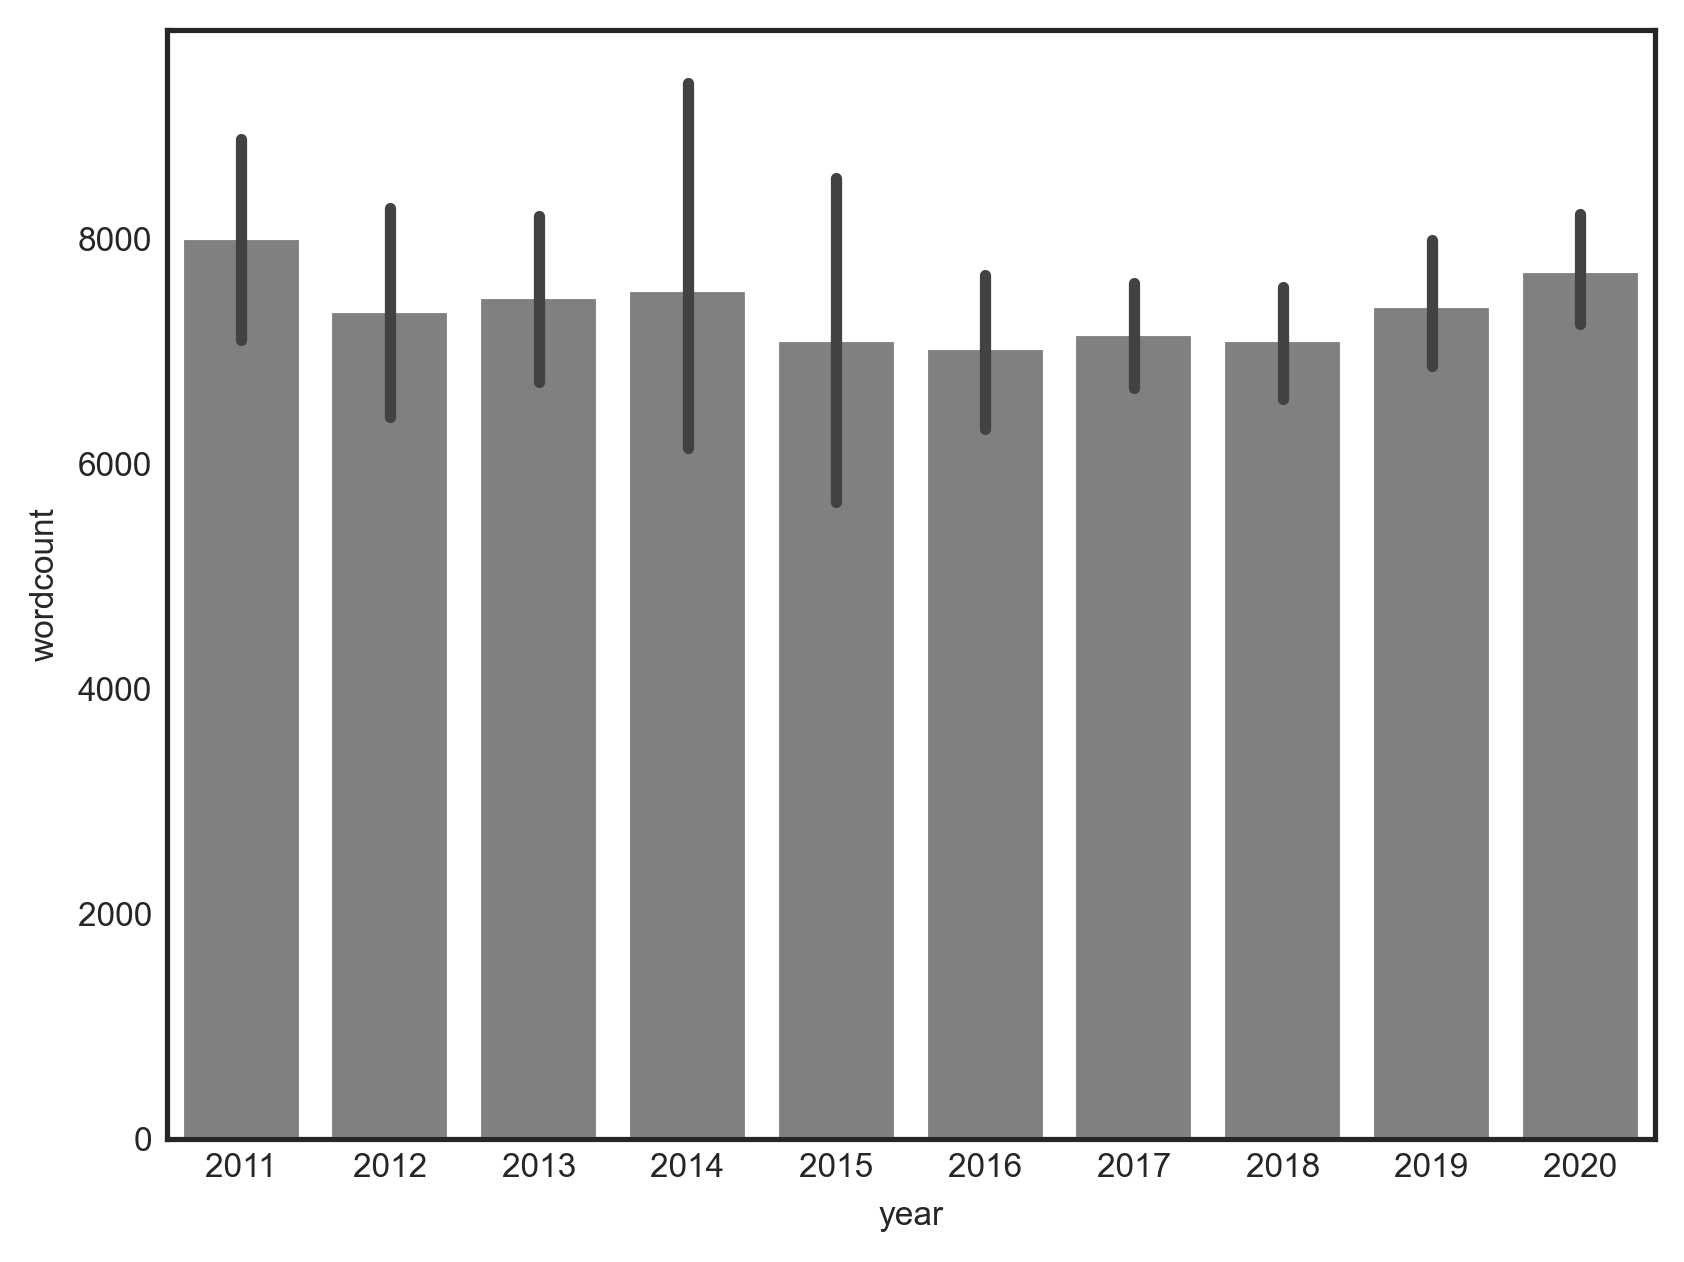

In [252]:
# average length of articles
sns.barplot(data=articles_metadata, x="year", y="wordcount", color="gray")

In [253]:
articles_metadata.groupby("year").sum()

,pop_id,populis*_N,wordcount
year,,,
2011,3799,1197,120091
2012,3899,699,117687
2013,5725,1166,157127
2014,7081,2471,181029
2015,5764,1793,141973
2016,13533,3732,344168
2017,19202,5654,507879
2018,19439,6219,553672
2019,35716,9621,917675


In [254]:
articles_metadata["year"] = articles_metadata["year"].replace(3017, 2017)

In [255]:
articles_metadata_sums = articles_metadata.groupby("year").sum().reset_index()
articles_metadata_sums

,year,pop_id,populis*_N,wordcount
0,2011,3799,1197,120091
1,2012,3899,699,117687
2,2013,5725,1166,157127
3,2014,7081,2471,181029
4,2015,5764,1793,141973
5,2016,13533,3732,344168
6,2017,19202,5654,507879
7,2018,19439,6219,553672
8,2019,35716,9621,917675
9,2020,31399,9622,933248


In [256]:
articles_metadata_sums["populis*_freq"] = np.round(articles_metadata_sums["populis*_N"] / articles_metadata_sums["wordcount"], 4)

In [257]:
articles_metadata_sums

,year,pop_id,populis*_N,wordcount,populis*_freq
0,2011,3799,1197,120091,0.0100
1,2012,3899,699,117687,0.0059
2,2013,5725,1166,157127,0.0074
3,2014,7081,2471,181029,0.0136
4,2015,5764,1793,141973,0.0126
5,2016,13533,3732,344168,0.0108
6,2017,19202,5654,507879,0.0111
7,2018,19439,6219,553672,0.0112
8,2019,35716,9621,917675,0.0105
9,2020,31399,9622,933248,0.0103


In [258]:
cm = plt.get_cmap("Greys")
color= cm(articles_metadata_sums["populis*_freq"] / articles_metadata_sums["populis*_freq"].max())

In [259]:
from matplotlib.cm import ScalarMappable


Text(0, 0.5, 'populis* frequency')

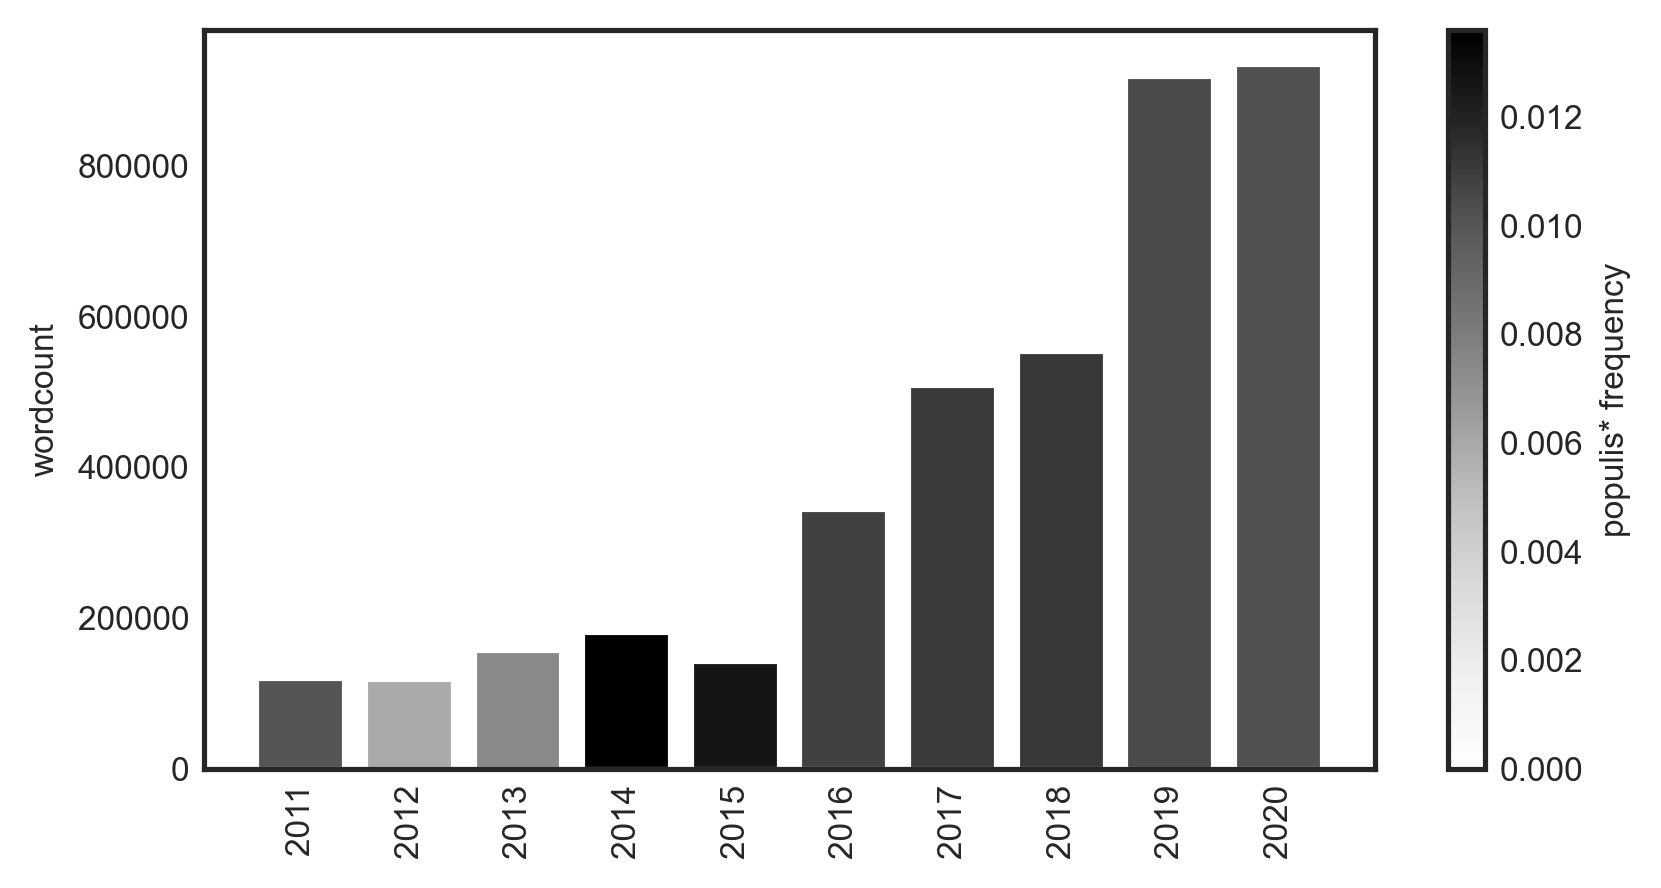

In [260]:
fig, ax = plt.subplots(figsize=(5.7, 3), dpi=300, tight_layout=True)
ax.bar(x=articles_metadata_sums["year"], height=articles_metadata_sums["wordcount"], color=color)
ax.ticklabel_format(style='plain')
ax.set_ylabel("wordcount")
ax.set_xticks(articles_metadata_sums["year"], )
ax.set_xticklabels(articles_metadata_sums["year"], rotation=90)

sm = ScalarMappable(cmap=cm)
# set colorbar properties
sm.set_array([])
sm.set_clim(0, articles_metadata_sums["populis*_freq"].max())

# create colorbar
cbar = plt.colorbar(sm, ax=ax)

# set colorbar label
cbar.ax.set_ylabel('populis* frequency')

In [261]:
fig.savefig("../figures/wordcount_by_years_bars.png")